###Text upload from the difficulty sheet.

In this milestone, we will process the data gathered in the milestone1.

In [ ]:
#Necessary Libraries

import pandas as pd 
import requests

#To handle files in the colab
from google.colab import files

#Matplotlib and seaborn

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Here we upload our data from the collectif excel file. 

In [ ]:
#LOAD Excel file from local 
from google.colab import files 
uploaded = files.upload()

Saving Data French difficulty.xlsx to Data French difficulty.xlsx


In [ ]:
#Load our data
data_omega = pd.read_excel("Data French difficulty.xlsx", sheet_name='Omega')

In [ ]:
#Loading from Brian github page

#Reading the dataframe to build our model
df_sam = pd.read_csv("https://raw.githubusercontent.com/98bao/BSA/main/Ressources/Data%20French%20difficulty%20-%20Samsung.csv")
df_omg  = pd.read_csv("https://raw.githubusercontent.com/98bao/BSA/main/Ressources/Data%20French%20difficulty%20-%20Omega.csv")
df_app = pd.read_csv("https://raw.githubusercontent.com/98bao/BSA/main/Ressources/Data%20French%20difficulty%20-%20Apple.csv")
merge = [df_sam, df_omg, df_app]
df = pd.concat(merge)

df.to_csv('out.csv')
df.head(5)

,Text,Difficulty,Difficulty Annotator 1,Difficulty Annotator 2,Difficulty Annotator 3,A2
0,"Je m'appelle Angélica Summer, j'ai 12 ans et j...",NaN,A1,A1,A1,NaN
1,Le bleu est très présent dans la nature : c’es...,NaN,A1,A1,A2,NaN
2,"Le rouge, le jaune et le bleu sont les trois c...",NaN,A1,A1,A2,NaN
3,"En les mélangeant, on peut former d’autres cou...",NaN,A1,A1,B1,NaN
4,"L’orange est la couleur de certains fruits, co...",NaN,A1,A1,B1,NaN


In [ ]:

#need to remove A2 column, only run once
df = df.drop(columns = ['A2', 'Difficulty'])

##Data pre-processing

In [ ]:
#Attributing numerical value to language difficulty
df = df.replace(['A1', 'A2', 'B1', 'B2', 'C1', 'C2'], [1,2,3,4,5,6])
df.to_csv('out.csv')

In [ ]:
df.dtypes
#need to convert col [1:3] into float

Text                      object
Difficulty Annotator 1    object
Difficulty Annotator 2    object
Difficulty Annotator 3    object
dtype: object

In [ ]:
df['Difficulty Annotator 1'] = pd.to_numeric(df['Difficulty Annotator 1'],errors = 'coerce')
df['Difficulty Annotator 2'] = pd.to_numeric(df['Difficulty Annotator 2'],errors = 'coerce')
df['Difficulty Annotator 3'] = pd.to_numeric(df['Difficulty Annotator 3'],errors = 'coerce')


In [ ]:
df['Difficulty'] = df.mean(axis=1)
df.head(5)

,Text,Difficulty Annotator 1,Difficulty Annotator 2,Difficulty Annotator 3,Difficulty
0,"Je m'appelle Angélica Summer, j'ai 12 ans et j...",1.0,1.0,1.0,1.000000
1,Le bleu est très présent dans la nature : c’es...,1.0,1.0,2.0,1.333333
2,"Le rouge, le jaune et le bleu sont les trois c...",1.0,1.0,2.0,1.333333
3,"En les mélangeant, on peut former d’autres cou...",1.0,1.0,3.0,1.666667
4,"L’orange est la couleur de certains fruits, co...",1.0,1.0,3.0,1.666667


In [ ]:
Omega_train_A1 = df[df['Difficulty'] < 1.33].sample(frac = 0.9)
Omega_test_A1 = df[df['Difficulty'] <1.33].drop(Omega_train_A1.index)

In [ ]:
Omega_train_A1

,Text,Difficulty Annotator 1,Difficulty Annotator 2,Difficulty Annotator 3,Difficulty
1012,NaN,1.0,1.0,1.0,1.0
81,NaN,1.0,1.0,1.0,1.0
945,Je suis battu.,1.0,1.0,1.0,1.0
35,NaN,1.0,1.0,1.0,1.0
3,NaN,1.0,1.0,1.0,1.0
...,...,...,...,...,...
73,NaN,1.0,1.0,1.0,1.0
777,"Il est monté sur le bras du fauteuil, mais au ...",1.0,1.0,1.0,1.0
147,"Nous avons déménagé en France, parce qu'elle a...",1.0,1.0,1.0,1.0
250,De longues heures s’enchaînent pendant lesquel...,1.0,1.0,1.0,1.0


In [ ]:
Omega_train_A2

,Text,Difficulty Annotator 1,Difficulty Annotator 2,Difficulty Annotator 3,Difficulty
255,NaN,2.0,2.0,2.0,2.000000
294,"Les passants semblent moins pressés, et s’atta...",2.0,2.0,2.0,2.000000
155,NaN,2.0,2.0,2.0,2.000000
391,"Le soir venu, il faut rentrer en prenant le mê...",2.0,2.0,2.0,2.000000
298,Ma mère Gertrude tient une mercerie,2.0,2.0,2.0,2.000000
...,...,...,...,...,...
192,"Chaque jour, Alice se lève vers six heures et ...",2.0,2.0,2.0,2.000000
77,Est-ce que tu voudrais venir avec nous ?,1.0,1.0,2.0,1.333333
43,"Le dimanche, nous aimons nous promener en fami...",1.0,1.0,3.0,1.666667
281,"Ce matin, James s’est levé tôt, a loué un vélo...",2.0,1.0,1.0,1.333333


In [ ]:
Omega_train_A1 = df[df['Difficulty'] < 1.33].sample(frac = 0.9)
Omega_test_A1 = df[df['Difficulty'] <1.33].drop(Omega_train_A1.index)

Omega_train_A2 = df[(df['Difficulty'] <2.33) & (df['Difficulty'] >=1.33)].sample(frac = 0.9)
Omega_test_A2 = df[(df['Difficulty'] <2.33) & (df['Difficulty'] >=1.33)].drop(Omega_train_A2.index)

Omega_train_B1 = df[(df['Difficulty'] <3.33) & (df['Difficulty'] >=2.33)].sample(frac = 0.9)
Omega_test_B1 = df[(df['Difficulty'] <3.33) & (df['Difficulty'] >=2.33)].drop(Omega_train_B1.index)

Omega_train_B2 = df[(df['Difficulty'] <4.33) & (df['Difficulty'] >=3.33)].sample(frac = 0.9)
Omega_test_B2 = df[(df['Difficulty'] <4.33) & (df['Difficulty'] >=3.33)].drop(Omega_train_B2.index)

Omega_train_C1 = df[(df['Difficulty'] <5.33) & (df['Difficulty'] >=4.33)].sample(frac = 0.9)
Omega_test_C1 = df[(df['Difficulty'] <5.33) & (df['Difficulty'] >=4.33)].drop(Omega_train_C1.index)

Omega_train_C2 = df[(df['Difficulty'] <6) & (df['Difficulty'] >=5.33)].sample(frac = 0.9)
Omega_test_C2 = df[(df['Difficulty'] <=6) & (df['Difficulty'] >=5.33)].drop(Omega_train_C2.index)

In [ ]:
Omega_train_B1

Full train and test data

In [ ]:
full_train_Omega = pd.concat([Omega_train_A1, Omega_train_A2, Omega_train_B1, Omega_train_B2, Omega_train_C1,Omega_train_C2])
full_test = pd.concat([Omega_test_A1, Omega_test_A2, Omega_test_B1, Omega_test_B2, Omega_test_C1, Omega_test_C2])

In [ ]:
full_test.Difficulty.nunique()

15

In [ ]:
full_test.groupby('Difficulty').count()

,Text,Difficulty Annotator 1,Difficulty Annotator 2,Difficulty Annotator 3
Difficulty,,,,
1.000000,14,19,19,19
1.333333,13,13,13,13
1.666667,3,3,3,3
2.000000,15,19,19,19
2.333333,2,4,4,4
2.666667,2,2,2,2
3.000000,18,28,28,28
3.333333,2,2,2,2
3.666667,3,3,3,3


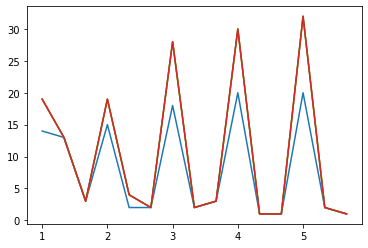

In [ ]:
plt.plot(full_test.groupby('Difficulty').count());

In [ ]:
large_table[large_table.duplicated() == True]

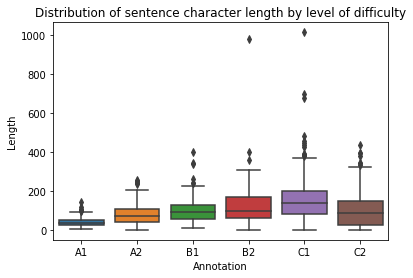

In [ ]:
sns.boxplot(x='Annotation', y='Length', data=large_table, order=['A1', 'A2', 'B1', 'B2', 'C1', 'C2'])
plt.title('Distribution of sentence character length by level of difficulty');

In [ ]:
#
import spacy
!pip install spacy-readability
from spacy_readability import Readability

In [ ]:
nlp = spacy.load('en')
read = Readability()
nlp.add_pipe(read, last=True)

In [ ]:
large_table.Text[0]

0    Dans une maison de retraite, on ressasse ce qu...
0    C’est l’un de leurs plus gros coups de communi...
0    Le château de Versailles sur la nouvelle appli...
0                                 Par ici, les mariés.
0    Yukihiro Kimura, inventeur du recyclage des co...
0    Après les écoles littéraires qui ont voulu nou...
0    L’apprentissage du code et plus largement d’un...
0    Par Carole DUFFRECHOU (Canada), Libération, lu...
Name: Text, dtype: object

In [ ]:
large_table

,Text,Annotation,Length
0,"Dans une maison de retraite, on ressasse ce qu...",A1,121
1,"Chloé\r Elle, c’est Gérarda, elle a 85 ans, et...",A1,105
2,Moi c’est Chloé et je vais vous raconter l’his...,A1,145
3,Séverine\r Je vis chez Gérarda avec ma fille d...,A1,60
4,Auparavant je l’avais connue par rapport à ma ...,A1,69
...,...,...,...
138,- Parce que vos produits sont plus chers ?,C1,42
139,- Alors nos produits sont fabriqués essentiell...,C1,446
140,- Et si vous avez envie de visiter sur le papi...,C1,116
141,Le Conservatoire publie\r cet ouvrage qui a po...,C1,294


In [ ]:
large_table.Annotation[0].astype

<bound method NDFrame.astype of 0    A1
0    A2
0    B1
0    B2
0    B2
0    C1
0    C2
0    C1
Name: Annotation, dtype: object>

In [ ]:
# Printing out Flesh-Kincaid grade level for the first sentence
doc = nlp(large_table.Annotation[0])
print(doc._.flesch_kincaid_grade_level)